<a href="https://colab.research.google.com/github/Imran-co/Machine-Intelligence/blob/main/MIL_2_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/housing.csv")
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
print(df.head())
print(df.shape)
print(df.info())
print(df.nunique())
print(df.describe())
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.dtypes)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries

In [ ]:
data = df

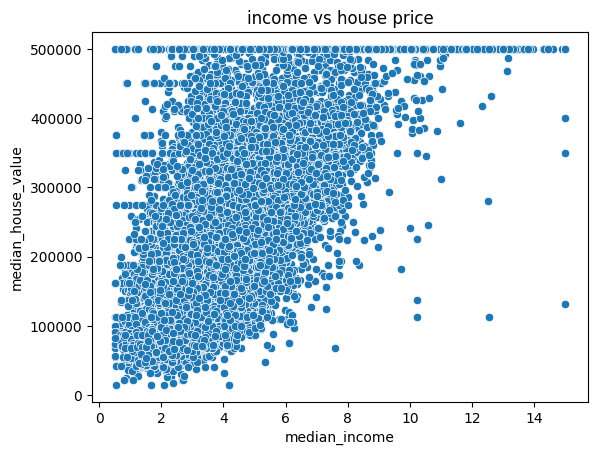

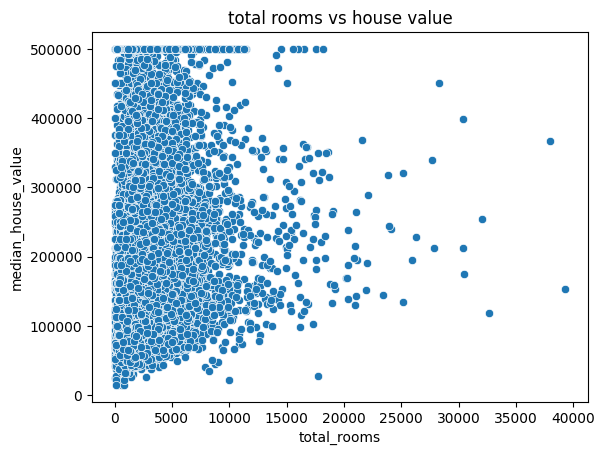

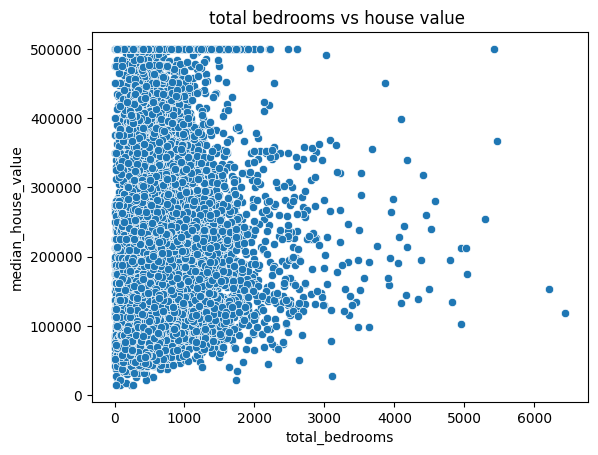

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



sns.scatterplot(x='median_income', y='median_house_value',data=data)
plt.title('income vs house price')
plt.show()


sns.scatterplot(x='total_rooms', y='median_house_value',data=data)
plt.title('total rooms vs house value')
plt.show()



sns.scatterplot(x='total_bedrooms', y='median_house_value',data=data)
plt.title('total bedrooms vs house value ')
plt.show()

In [ ]:
data = df
data = data.drop('ocean_proximity', axis=1)

In [ ]:
#correlation
correlation=data.corr()
print(correlation)



                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

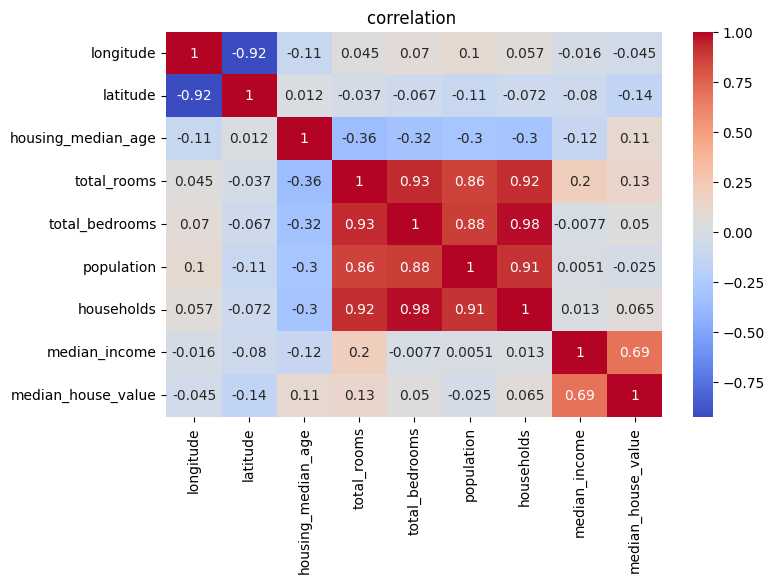

In [ ]:
#visulaization

plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("correlation ")
plt.show()

In [ ]:
Q1 = df["median_house_value"].quantile(0.45)
Q3 = df["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

low_bound = Q1 - 1.0 * IQR
upp_bound = Q3 + 1.0 * IQR


data_clean = df[(df["median_house_value"] >= low_bound) & (df["median_house_value"] <= upp_bound)]


In [ ]:
#simple linear model
X = data_clean[['median_income']]
y = data_clean['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

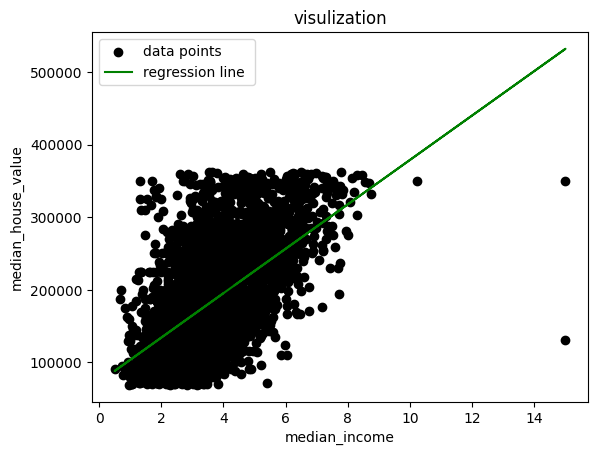

In [ ]:
#visulization
plt.scatter(X_test,y_test,color="black",label="data points")
plt.plot (X_test,y_pred,color="green",label='regression line ')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('visulization')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_test, y_pred)

print("R-Squared: ", r2)

R-Squared:  0.3418792633407177


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

Mean Squared Error:  3571548045.3472886
